SAMK has budgeted up to 8000€ per week for local advertisement. The money is to be allocated among four promotional media: TV spots, newspaper ads, and two types of radio advertisements. The goal is to reach the largest possible high-potential audience through the various media. The following table presents the number of potential customers reached by making use of advertisement in each of the four media. It also provides the cost per advertisement placed and the maximum number of ads than can be purchased per week.

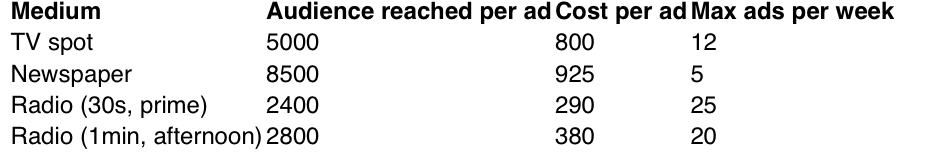

The company arrangements require that at least five radio spots be placed each week. To ensure a board-scoped promotional campaign, management also insists that no more than 1800€ be spent on radio advertising every week.

### Intro
This code is based on https://towardsdatascience.com/how-to-solve-optimization-problems-with-python-9088bf8d48e5  
and a bit of https://realpython.com/linear-programming-python/

In [1]:
from pulp import *
import pandas as pd

data = [['TV spot', 5000, 800, 12], ['Newspaper', 8500, 925, 5], ['Radio (30s, prime)', 2400, 290, 25], ['Radio (1min, afternoon)', 2800, 380, 20]]
  
# Creating the pandas DataFrame
data = pd.DataFrame(data, columns=['Ad', 'Audience per ad', 'Cost per ad', 'Max ads per week'])
  
# printing dataframe
data

,Ad,Audience per ad,Cost per ad,Max ads per week
0,TV spot,5000,800,12
1,Newspaper,8500,925,5
2,"Radio (30s, prime)",2400,290,25
3,"Radio (1min, afternoon)",2800,380,20


In [2]:
# Name of ads
ads = list(data['Ad'])
# Price
cost = dict(zip(ads, data['Cost per ad']))
# Max amount of ads
max_ads = dict(zip(ads, data['Max ads per week']))
# Audience
audience = dict(zip(ads, data['Audience per ad']))

In [3]:
# Defining the problem
total_score = LpProblem("Ad_Problem", LpMaximize)

In [4]:
x = {i: LpVariable(name=f"x{i}", lowBound=0, cat = "Integer") for i in range(1, 5)}

In [5]:
# Constraints
total_score += lpSum([cost['TV spot']*x[1]+cost['Newspaper']*x[2]+cost['Radio (30s, prime)']*x[3]+cost['Radio (1min, afternoon)']*x[4]]) <= 8000
total_score += lpSum([cost['Radio (30s, prime)'] * x[3] + cost['Radio (1min, afternoon)'] * x[4]]) <= 1800
total_score += x[3] + x[4] >= 5
total_score += (x[1] <= 12, "TV spot")
total_score += (x[2] <= 5, "Newspaper")
total_score += (x[3] <= 25, "Radio (30s, prime)")
total_score += (x[4] <= 20, "Radio (1min, afternoon)")

In [6]:
# The objective
total_score += 5000 * x[1] + 8500 * x[2] + 2400 * x[3] + 2800 * x[4]

In [7]:
status = total_score.solve()

# Get the results
print(f"status: {total_score.status}, {LpStatus[total_score.status]}")
print(f"objective: {total_score.objective.value()}")

for var in x.values():
    print(f"{var.name}: {var.value()}")

for name, constraint in total_score.constraints.items():
    print(f"{name}: {constraint.value()}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /usr/local/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/71/f5_kmrcs66n0vw3_p0xb1s640000gn/T/64dfdcfe2c264a6db867e07f3590e8cd-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/71/f5_kmrcs66n0vw3_p0xb1s640000gn/T/64dfdcfe2c264a6db867e07f3590e8cd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 37 RHS
At line 45 BOUNDS
At line 50 ENDATA
Problem MODEL has 7 rows, 4 columns and 12 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 67240.3 - 0.00 seconds
Cgl0003I 0 fixed, 1 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 3 rows, 4 columns (4 integer (0 of which binary)) and 8 elements
Cutoff increment increased from 1e-05 to 99.9999
Cbc0012I Integer solution of -66900 found by DiveCoefficien

# The conclusion
### The maximum audience we can get is 66900 people with a budget 8000€ per week.
### For that we need to buy 2 TV spot, 5 Newspaper and 6 Radio (30s, prime) advertisements.